# Tesis de Licenciatura en Astronomía

## Manuel López Vargas

# Detección de señales en series de tiempo astronómicas utilizando algoritmos de Machine Learning

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.signal as signal

In [14]:
rng = np.random.default_rng()

In [127]:
A = 2
B = 3
w1 = 3.28 #rad/sec
w2 = 2.3 #rad/sec
psi1 = 1. #rad
psi2 = 0. #rad
n_in = 150
n_out = 100000

Generamos aleatoriamente tiempos de muestreo.

In [128]:
t = rng.uniform(0, 10*np.pi, n_in)

Ploteamos dos ondas sinusoidales con freciencias diferentes ($\frac{w1}{w2}\neq Q$) para los tiempos seleccionados.

In [144]:
x = A * np.sin(w1*t + psi1) + B * np.sin(w2*t + psi2)

Definimos un arreglo de frecuencias para el que se calculará el periodograma

In [145]:
w = np.linspace(0.01, 10, n_out)
periods = 2 * np.pi / w

Calculo el Lomb-Scargle periodograma

In [146]:
pgram = signal.lombscargle(t, x, w, normalize=True)

Ploteo los datos de salida

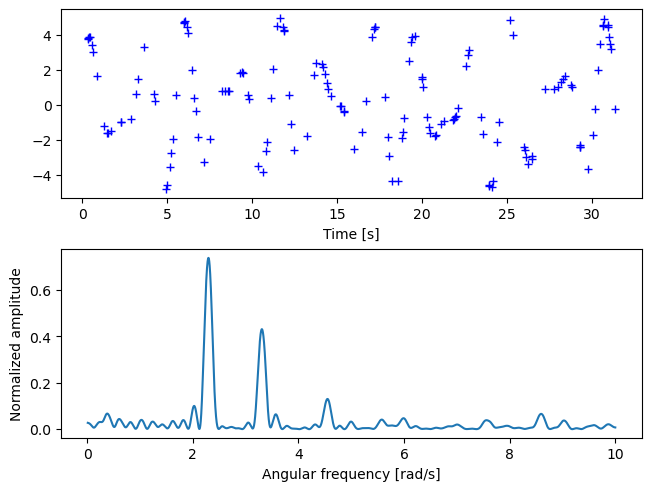

In [147]:
fig, (ax_t, ax_w) = plt.subplots(2, 1, constrained_layout=True)
ax_t.plot(t, x, 'b+')
ax_t.set_xlabel('Time [s]')

#Luego ploteo el periodograma normalizado

ax_w.plot(w, pgram)
ax_w.set_xlabel('Angular frequency [rad/s]')
ax_w.set_ylabel('Normalized amplitude')
plt.show();

Los resultados no cambian cuando $(\frac{w1}{w2}= Q)$

Probamos con otro codigo.

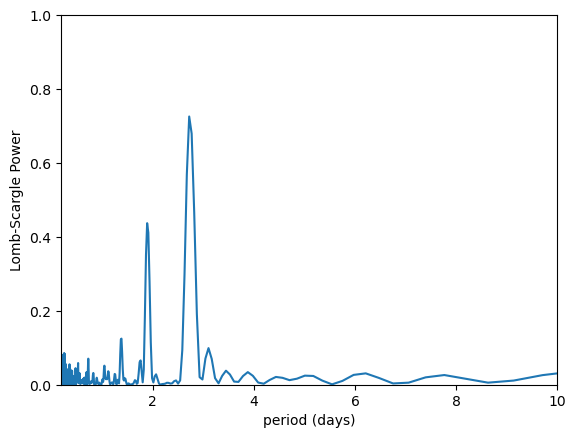

In [169]:
from gatspy.periodic import LombScargleFast

model = LombScargleFast().fit(t, x)
periods, power = model.periodogram_auto(nyquist_factor=10)

fig, ax = plt.subplots()
ax.plot(periods, power)
ax.set(xlim=(0.2, 10), ylim=(0, 1.0),
        xlabel='period (days)',
        ylabel='Lomb-Scargle Power');

In [167]:
# set range and find period
model.optimizer.period_range=(1.5,2.0)
period = model.best_period
#print("period = {0}".format(period))
nu = 2 * np.pi / period
print('La frecuencia encontrada es:', nu, period)


Finding optimal frequency:
 - Estimated peak width = 0.202
 - Using 5 steps per peak; omega_step = 0.0405
 - User-specified period range:  1.5 to 2
 - Computing periods at 27 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
La frecuencia encontrada es: 3.3062353080811286 1.9004047569821092


In [168]:
model.optimizer.period_range=(2.3,3.2)
period2 = model.best_period
#print("period = {0}".format(period))
nu2 = 2 * np.pi / period
print('La frecuencia encontrada es:', nu2, period2)

La frecuencia encontrada es: 3.3062353080811286 1.9004047569821092


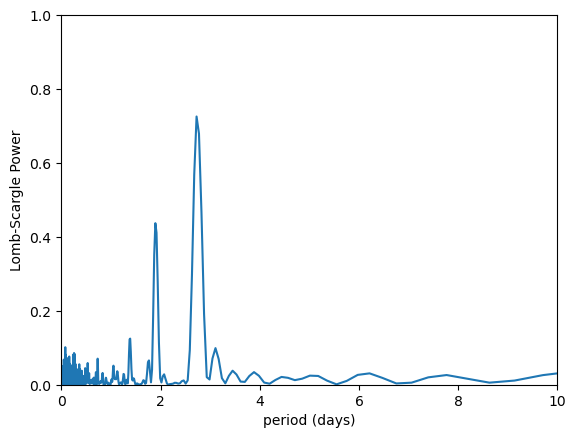

In [170]:
from gatspy.periodic import LombScargle

model1 = LombScargle(fit_offset=True).fit(t, x)
power1 = model1.score(periods)

# plot the results
fig, ax = plt.subplots()
ax.plot(periods, power1)
ax.set(ylim=(0, 1.0),xlim=(0,10), xlabel='period (days)',
       ylabel='Lomb-Scargle Power');

In [153]:
# set range and find period
model1.optimizer.period_range=(1.5,2.5)
period1 = model1.best_period
#print("period = {0}".format(period))
nu1 = (2 * np.pi) / period1
print('La frecuencia encontrada es:', nu1, period1)

Finding optimal frequency:
 - Estimated peak width = 0.202
 - Using 5 steps per peak; omega_step = 0.0405
 - User-specified period range:  1.5 to 2.5
 - Computing periods at 43 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
La frecuencia encontrada es: 3.3057433124259537 1.9006875953017073


#### Calculamos la False-Alarm Probablility (FAP).

La FAP se define como FAP(z) = $1 - [P_{single0}(z)]^{N_{eff.}}$ donde $N_{eff.}= f_{max}T$